<a href="https://colab.research.google.com/github/gokayozdemr/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Assuming the dataset, file name 'titanic.csv'
titanic_df = pd.read_csv('https://drive.usercontent.google.com/u/0/uc?id=1xa4BzejCy-JA_x3ynoX4aHO5fXLrzGYJ&export=download')



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

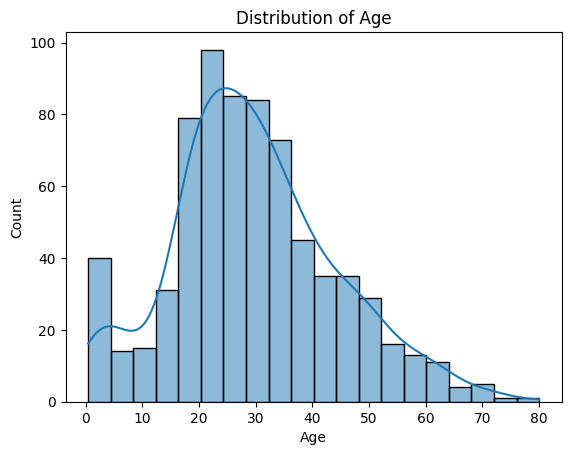

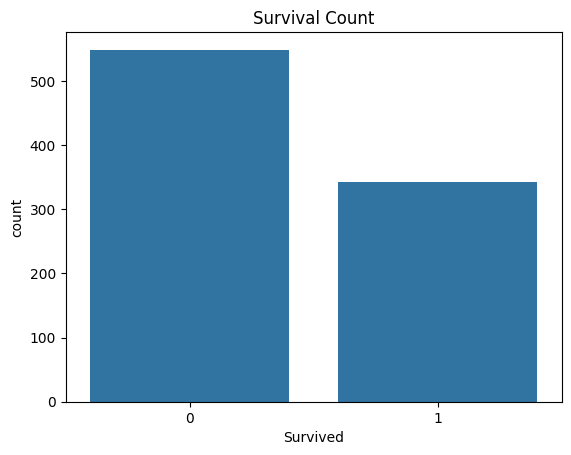

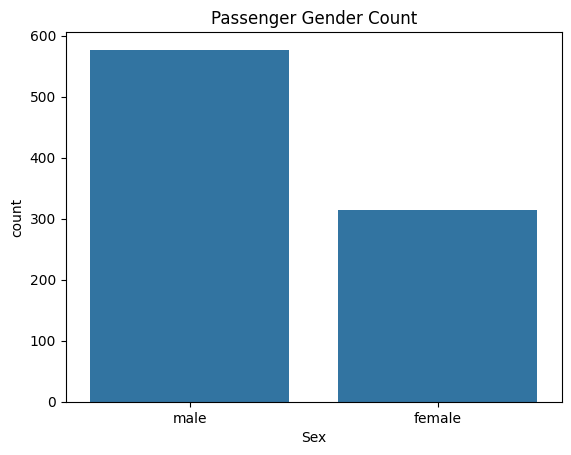

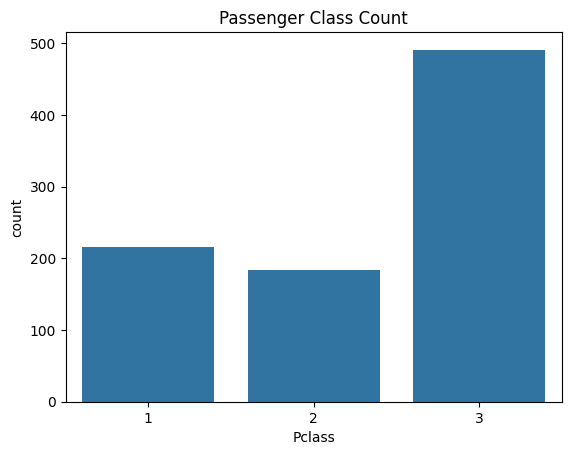

In [4]:
# Display first few rows of the dataset
print(titanic_df.head())

# Check the summary statistics
print(titanic_df.describe())

# Check the data types and missing values
print(titanic_df.info())

# Visualize the distribution of numerical features
sns.histplot(data=titanic_df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

sns.countplot(data=titanic_df, x='Survived')
plt.title('Survival Count')
plt.show()

# Explore categorical features
sns.countplot(data=titanic_df, x='Sex')
plt.title('Passenger Gender Count')
plt.show()

sns.countplot(data=titanic_df, x='Pclass')
plt.title('Passenger Class Count')
plt.show()


In [5]:
# Handling missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Encoding categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Feature scaling (if needed)
# Example: Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])

# Feature engineering (if needed)
# Example: Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Drop 'SibSp' and 'Parch' after creating 'FamilySize'
titanic_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)


In [6]:
# Display processed DataFrame
print(titanic_df.head())

# Save the processed DataFrame to a new CSV file
titanic_df.to_csv('processed_titanic.csv', index=False)


   Survived  Pclass       Age      Fare  Sex_male  Embarked_Q  Embarked_S  \
0         0       3 -0.565736 -0.502445      True       False        True   
1         1       1  0.663861  0.786845     False       False       False   
2         1       3 -0.258337 -0.488854     False       False        True   
3         1       1  0.433312  0.420730     False       False        True   
4         0       3  0.433312 -0.486337      True       False        True   

   FamilySize  
0           2  
1           2  
2           1  
3           2  
4           1  


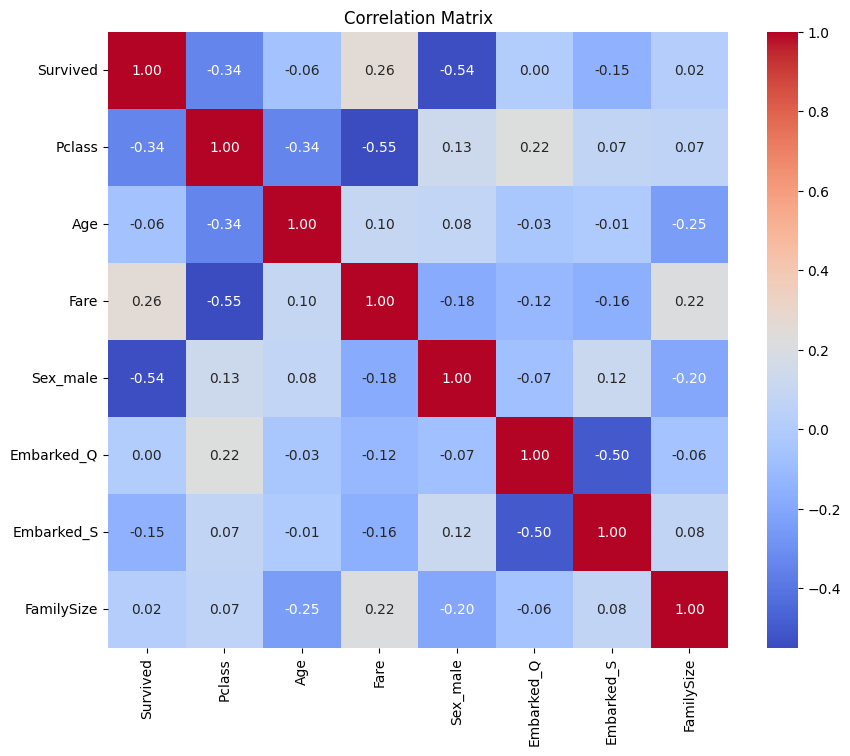

In [7]:
# Correlation matrix
correlation_matrix = titanic_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


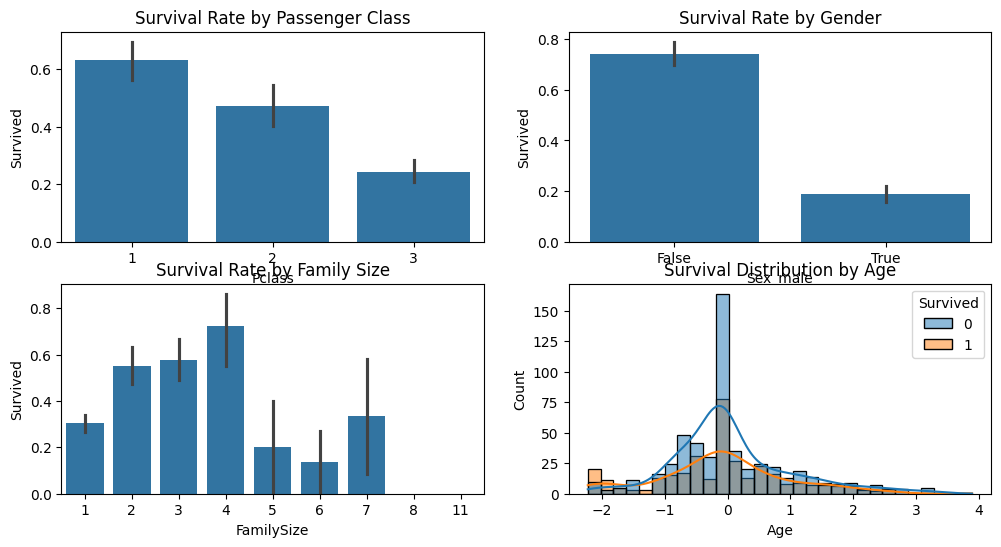

In [8]:
# Relationship between Survived and other features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(data=titanic_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')

plt.subplot(2, 2, 2)
sns.barplot(data=titanic_df, x='Sex_male', y='Survived')
plt.title('Survival Rate by Gender')

plt.subplot(2, 2, 3)
sns.barplot(data=titanic_df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')

plt.subplot(2, 2, 4)
sns.histplot(data=titanic_df, x='Age', hue='Survived', kde=True)
plt.title('Survival Distribution by Age')
plt.show()


In [9]:
# Feature engineering: Create a new feature 'IsAlone' to indicate if the passenger is alone
titanic_df['IsAlone'] = (titanic_df['FamilySize'] == 1).astype(int)

# Drop 'FamilySize' after creating 'IsAlone'
titanic_df.drop(['FamilySize'], axis=1, inplace=True)

# Final check
print(titanic_df.head())

# Save the final processed DataFrame to a new CSV file
titanic_df.to_csv('final_processed_titanic.csv', index=False)


   Survived  Pclass       Age      Fare  Sex_male  Embarked_Q  Embarked_S  \
0         0       3 -0.565736 -0.502445      True       False        True   
1         1       1  0.663861  0.786845     False       False       False   
2         1       3 -0.258337 -0.488854     False       False        True   
3         1       1  0.433312  0.420730     False       False        True   
4         0       3  0.433312 -0.486337      True       False        True   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


In [10]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
print("Support Vector Machines Classifier Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Decision Tree Classifier Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

Support Vector Machines Classifier Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Random Forest Classifier Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       105
           1       0.77      0.81      0.79        74

    accura

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_pred = gb_classifier.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
print("K-Nearest Neighbors Classifier Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)
print("Naive Bayes Classifier Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Gradient Boosting Classifier Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

K-Nearest Neighbors Classifier Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Naive Bayes Classifier Accuracy: 0.770949720670391
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy 

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

new_cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

new_cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

new_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

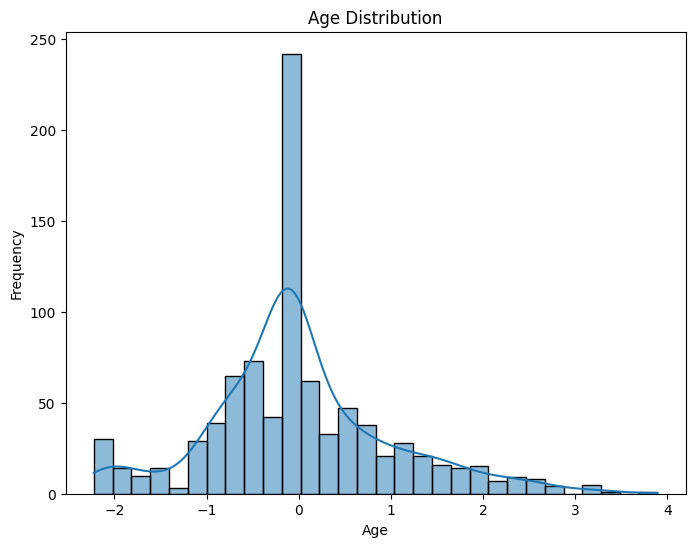

In [14]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


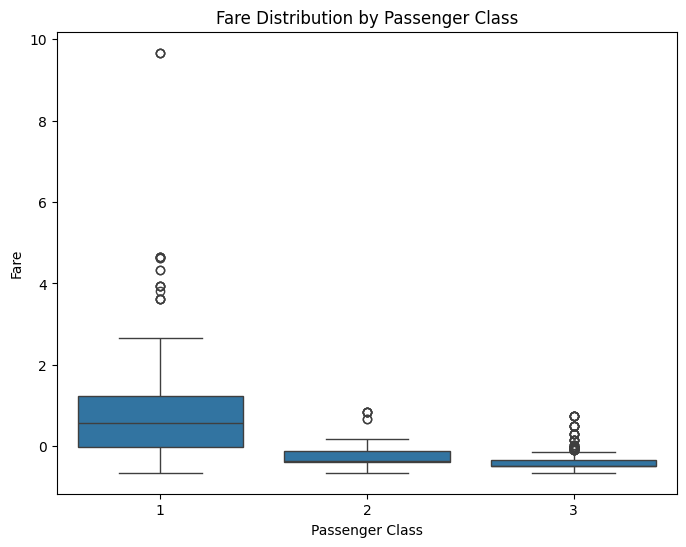

In [ ]:
# Boxplot of Fare by Passenger Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


<ipython-input-14-b1ca4adb32d2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic_df, x='Sex_male', y='Survived', ci=None)


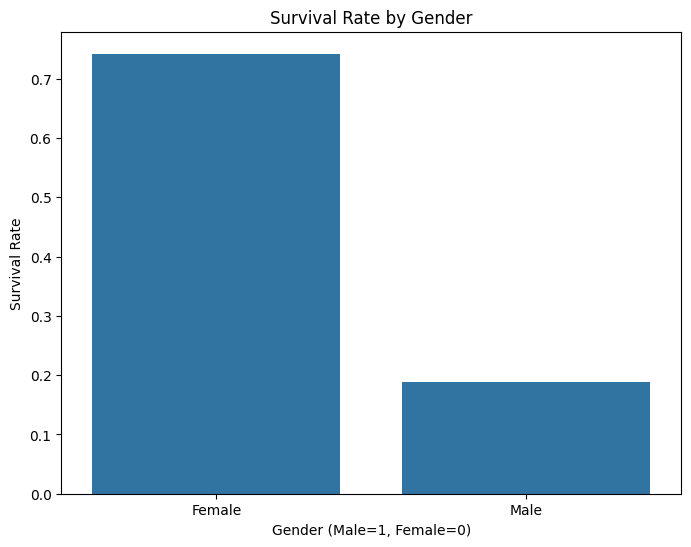

In [ ]:
# Barplot of Survival by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic_df, x='Sex_male', y='Survived', ci=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (Male=1, Female=0)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


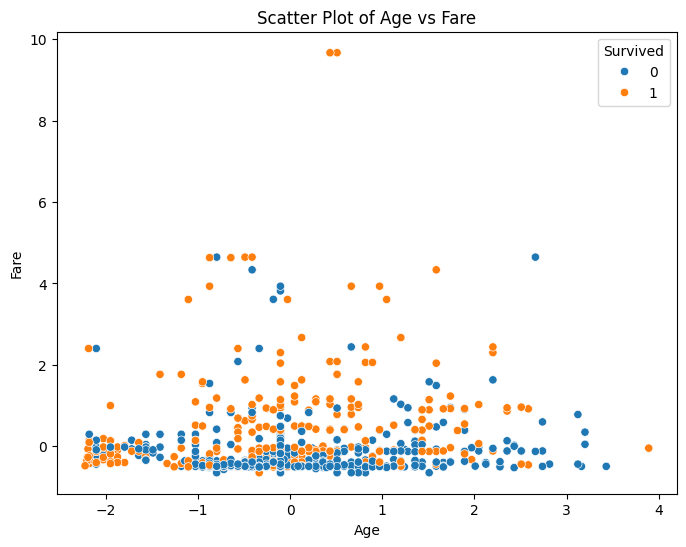

In [16]:
# Scatter plot of Age and Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


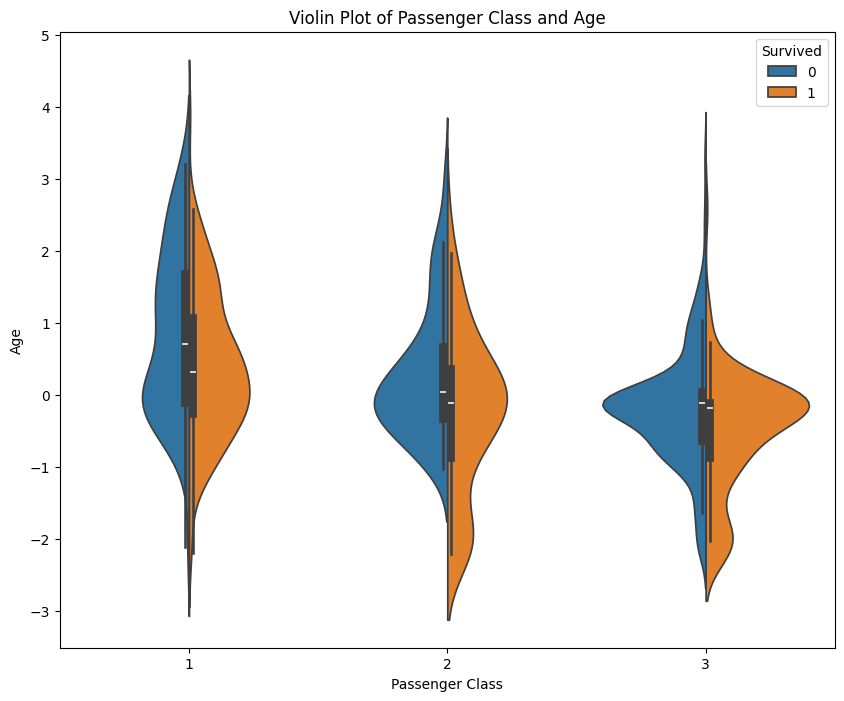

In [17]:
# Violin plot of Passenger Class and Age
plt.figure(figsize=(10, 8))
sns.violinplot(data=titanic_df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Violin Plot of Passenger Class and Age')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


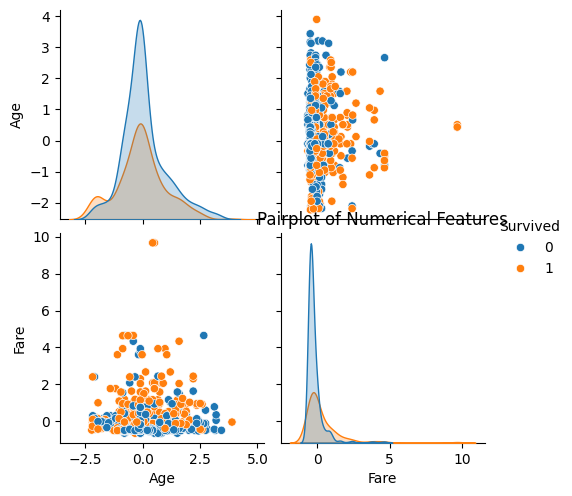

In [18]:
# Pairplot of numerical features
sns.pairplot(titanic_df[['Age', 'Fare', 'Survived']], hue='Survived', diag_kind='kde')
plt.title('Pairplot of Numerical Features')
plt.show()


<ipython-input-19-b78f93ef0f25>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=titanic_df, x='Age', y='Fare', hue='Survived', ci=None)


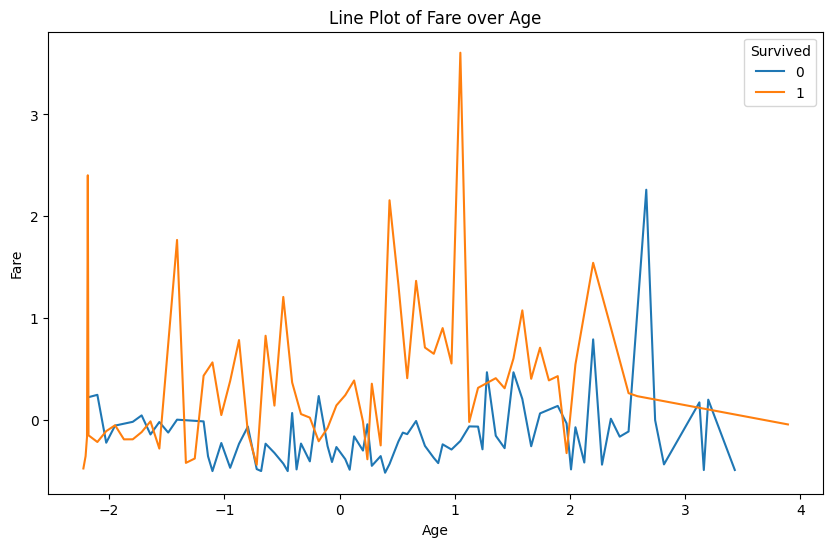

In [19]:
# Line plot of Fare over Age
plt.figure(figsize=(10, 6))
sns.lineplot(data=titanic_df, x='Age', y='Fare', hue='Survived', ci=None)
plt.title('Line Plot of Fare over Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


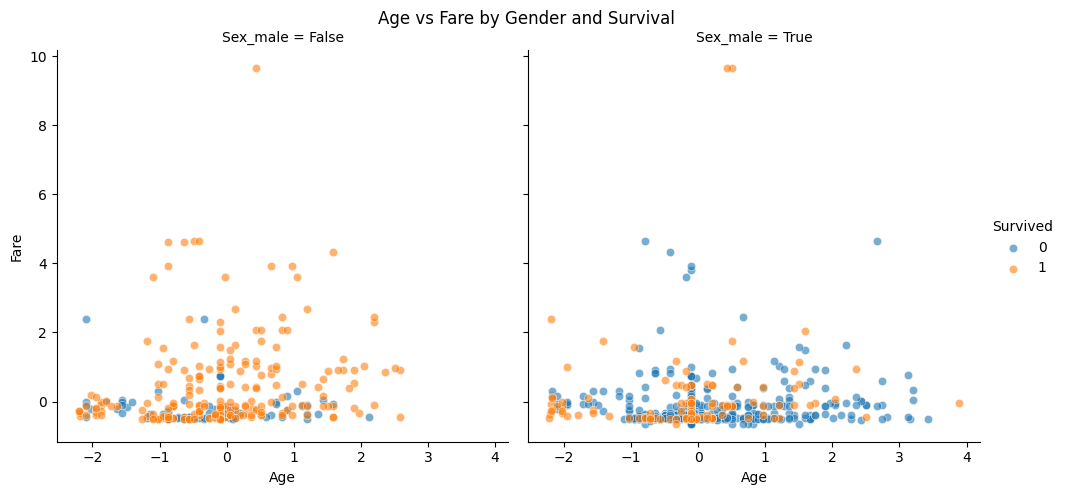

In [20]:
# FacetGrid for Age vs Fare by Gender and Survival
g = sns.FacetGrid(titanic_df, col="Sex_male", hue="Survived", height=5)
g.map(sns.scatterplot, "Age", "Fare", alpha=0.6)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age vs Fare by Gender and Survival')
plt.show()


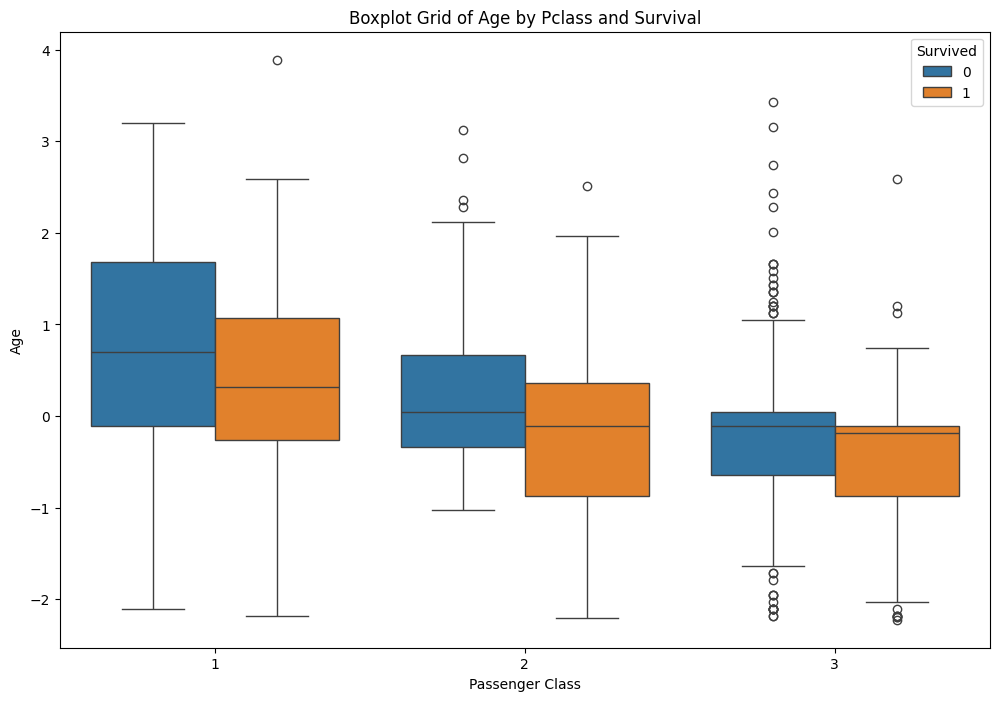

In [21]:
# Boxplot Grid of Age by Pclass and Survival
plt.figure(figsize=(12, 8))
sns.boxplot(data=titanic_df, x='Pclass', y='Age', hue='Survived')
plt.title('Boxplot Grid of Age by Pclass and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


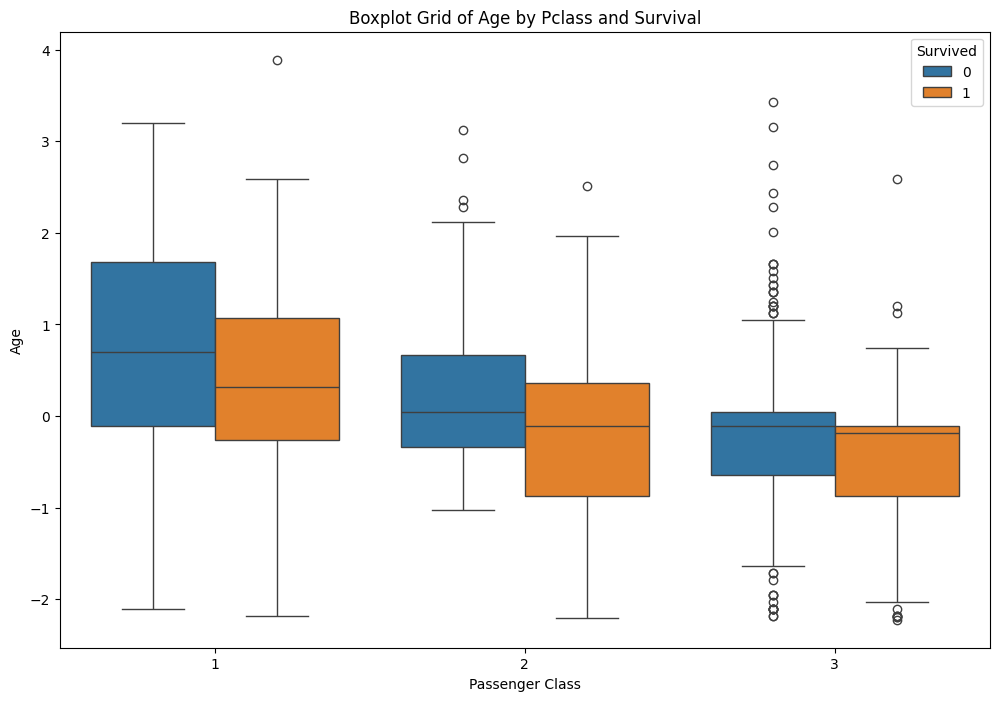

In [22]:
# Boxplot Grid of Age by Pclass and Survival
plt.figure(figsize=(12, 8))
sns.boxplot(data=titanic_df, x='Pclass', y='Age', hue='Survived')
plt.title('Boxplot Grid of Age by Pclass and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


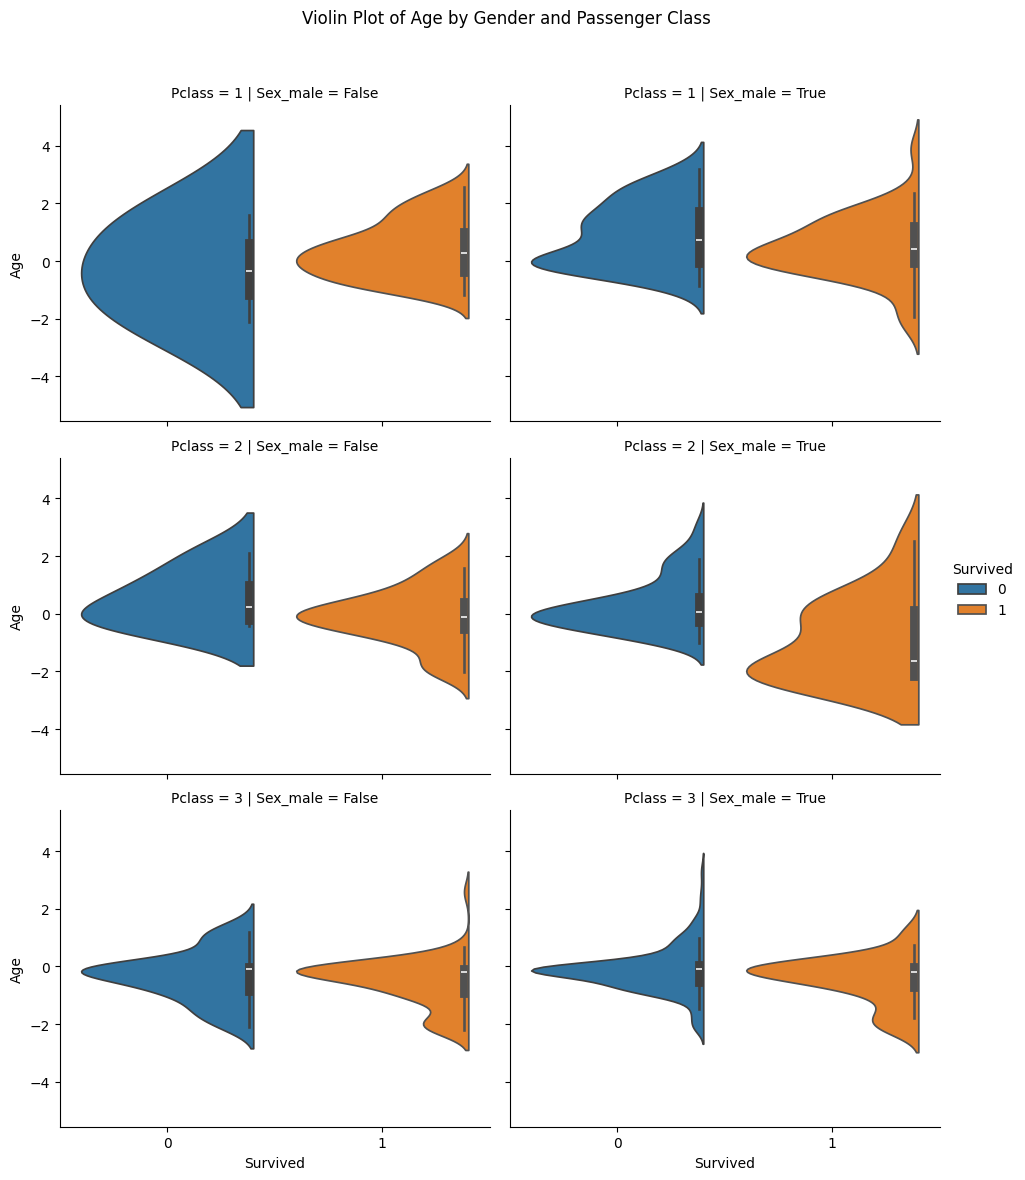

In [23]:
# FacetGrid with Violin Plot of Age by Gender and Passenger Class
g = sns.FacetGrid(titanic_df, col="Sex_male", row="Pclass", hue="Survived", height=4, aspect=1.2)
g.map(sns.violinplot, "Survived", "Age", split=True)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Violin Plot of Age by Gender and Passenger Class')
plt.show()


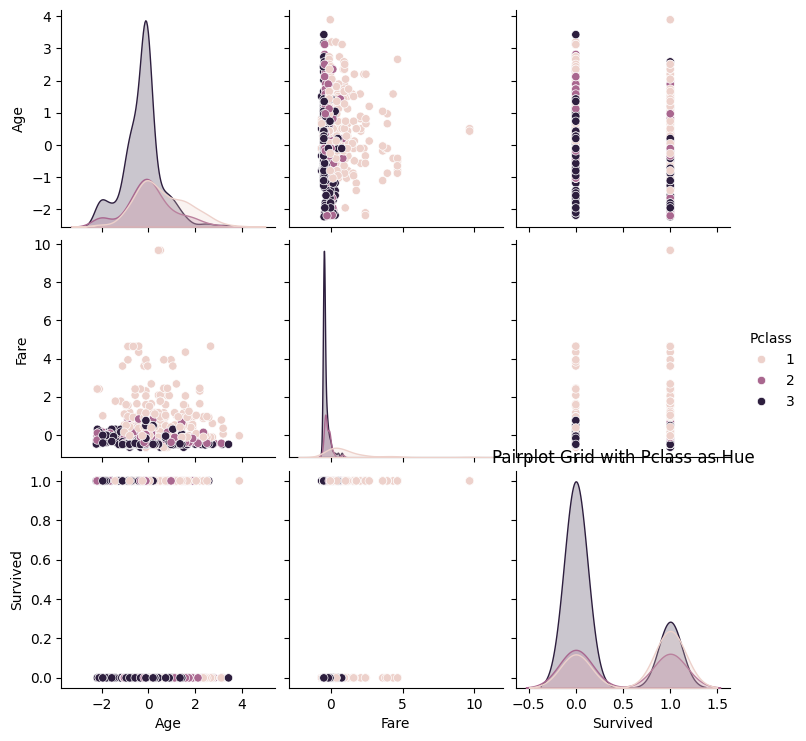

In [24]:
# Pairplot Grid with different hue
sns.pairplot(titanic_df[['Age', 'Fare', 'Survived', 'Pclass']], hue='Pclass', diag_kind='kde')
plt.title('Pairplot Grid with Pclass as Hue')
plt.show()
